# Near Infra-Red Spectroscopy Predicts Crude Protein in Hemp Grain

Ryan Crawford (Cornell University)  
Jamie Crawford (Cornell University)  
Lawrence B. Smart (Cornell AgriTech)  
Virginia Moore (Cornell University)  
March 16, 2024

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Attaching package: 'data.table'

The following objects are masked from 'package:lubridate':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year

The following objects are masked from 'package:dplyr':

    between, first, last

The following object is masked from 'package:purrr':

    transpose

Loading required package: lattice

Attaching package: 'caret'

The following object is masked from 'package:purrr':

    lift

prospectr version 0.2.7 -- cakes
check the package repository at: https://github.com/l-ramirez-lopez/prospectr


Attaching package: 'pls'

The following object is masked from 'package:prospectr':

    msc

The following object is masked from 'package:caret':

    R2

The following object is masked from 'package:stats':

    loadings

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──
✔ broom        1.0.5      ✔ rsample      1.2.0 
✔ dials        1.2.1      ✔ tune         1.1.2 
✔ infer        1.0.6      ✔ workflows    1.1.4 
✔ modeldata    1.3.0      ✔ workflowsets 1.0.1 
✔ parsnip      1.2.0      ✔ yardstick    1.3.0 
✔ recipes      1.0.10     
── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ data.table::between()    masks dplyr::between()
✖ scales::discard()        masks purrr::discard()
✖ dplyr::filter()          masks stats::filter()
✖ data.table::first()      masks dplyr::first()
✖ recipes::fixed()         masks stringr::fixed()
✖ dplyr::lag()             masks stats::lag()
✖ data.table::last()       masks dplyr::last()
✖ caret::lift()            masks purrr::lift()
✖ yardstick::precision()   masks caret::precision()
✖ yardstick::recall()      masks caret::recall()
✖ yardstick::sensitivity() masks caret::sensitivity()
✖ yardstick::spec()        ma


Attaching package: 'nlme'

The following object is masked from 'package:dplyr':

    collapse

**incomplete: may contain errors, run-ons, half-thoughts, etc.**

## INTRODUCTION

Hemp (Cannabis sativa L.) is an annual crop with potential uses as a source of food or feed from grain, and bast fiber or hurd from the stalk. Hemp cultivars are commonly grown for one or both purposes and a cultivar may be referred to as a grain, fiber, or dual-purpose type. Because of protein’s nutritional importance, the protein content of a grain crop is an prime consideration for researchers, producers, and consumers. Whole hemp grain typically contains approximately 20-30% protein \[@ely_industrial_2022; @barta_proteomic_2024; @callaway2004\]. Crude protein (CP) is often used as a proxy for the direct measurement of protein concentration and consists of the multiplication of nitrogen concentration by a conversion factor because measuring nitrogen concentration is relatively easy and cheap via laboratory assay \[@hayes_measuring_2020\].

Near-infrared spectroscopy (NIRS) technology is rapid, non-destructive, and cheap, and consists of the measurement of NIR radiation reflected from a sample \[@roberts_near-infrared_2004\]. NIR spectra from many samples are related to laboratory values for components such as moisture, protein, fat, or fiber \[@roberts_near-infrared_2004\]. NIRS technology has been used since the 1970’s to assess forage CP \[@reeves_potential_2012; @williams_application_1975\]. A NIRS calibration set often consists of samples from one species grown in many environments encompassing the range of expected values from the analyte or analytes \[@chadalavada_nir_2022\]. Partial least squares regression (PLSR) is a typical method used in the agricultural and food sciences to relate spectra to analyte \[@roberts_near-infrared_2004\]. PLSR calculates principal components (PCs) which relate to the dependent variable and summarize the spectra and uses a subset of PCs in order to fit the regression model. PLSR is commonly used in spectroscopy because it tends to work well with highly-correlated spectral data. Typically the number of principal components is chosen via cross-validation to avoid overfitting. **CITES FOR ALL OF THIS**

A NIRS-scanned sample of undamaged grain may subsequently be grown, an important consideration for a plant breeder. In wheat and corn, grain protein content has been shown to be heritable \[@giancaspro_genetic_2019; @geyer_genetics_2022\]. This suggests (at least potentially) that NIRS technology could serve as resource to more rapidly identify high CP hemp germplasm, enabling the delivery of higher CP hemp grain cultivars faster.

For this study, a benchtop NIR spectrometer was used to develop a model to predict CP content based on a data set of hemp grain representing multiple years, locations, and cultivars from grain and dual-purpose hemp types using PLSR.

## MATERIALS AND METHODS

In [ ]:
bckgrnd <- fread("./input_data/simplified_data/background_data_set.csv") |> setDT()

spectra <- fread("./input_data/simplified_data/train_test_crude_protein.csv")

 bckgrnd[,in_ny:= ifelse(loc!="kentucky", T, F)]
 
bg2 <- bckgrnd[loc!="kentucky"]

# extract indices of non-kentucky
bg_indices <- bckgrnd[loc!="kentucky", which = T]

# correct names in bg2--should be h-51, NOT hl-51

bg2[cultivar=="hl-51"]$cultivar <- "h-51"

# check to see if i did the calc correctly

bg2[grepl("51", cultivar),]

   temp_id harv_year       loc cultivar       type  in_ny
     <int>     <int>    <char>   <char>     <char> <lgcl>
1:     141      2019 rn041_gen     h-51       dual   TRUE
2:     149      2019       mcg     h-51 multistate   TRUE
3:      15      2021    ithaca     h-51 multistate   TRUE

### Hemp Grain Sample Background

Spectral data were obtained from whole (unground) hemp grain samples, harvested at maturity, collected from 2017 - 2021 from 18 cultivar trials in New York (NY) (149 samples). Grain samples were obtained by hand sampling or mechanical harvest and were cleaned of chaff and dried at 30 C for six days in a forced-air dryer. In total, 38 cultivars were represented in the data set. Cultivars were grain or dual-purpose types and included both commercially available and experimental material.

All cultivar trials were planted in randomized complete block design with each cultivar replicated four times. The 2017 data were comprised of samples from the same thirteen cultivars sampled from six NY locations. For those trials, grain was harvested from each plot individually and aggregated by cultivar within each trial. Four subsamples were drawn from each aggregated sample and scanned separately. These spectra were averaged at each 2 nm increment. All remaining samples from 2018-2021 were collected on a per-plot basis. All possible cultivars and possible locations were represented in 2017, but only a selected subset of cultivars and locations were represented in 2018-2021.

### Spectral Data Collection and Preprocessing

A benchtop NIR spectrometer (FOSS/ NIR FOSS/ NIR Systems model 5000) was used to obtain the spectra (FOSS North America, Eden Prairie, MN, USA). Spectra were collected every 2 nm from 1100-2498 nm and the logarithm of reciprocal reflectance was recorded.

WINISI software version 1.02A (Infrasoft International, Port Matilda, PA, USA) was used to average the spectra in 2017, as well as to select samples for laboratory assay. Samples were selected according to their spectral distance from their nearest neighbor within the calibration data set with a cutoff of a distance of 0.6 H, where H is approximately equal to the squared Mahalanobis distance divided by the number of principal components used in the calculation \[@garrido-varo_note_2019\]. Prior to selection selection, spectra were preprocessed using SNV-detrend with settings 1,4,4,1 for the derivative, gap, smooth, and smooth 2 settings respectively.

### Laboratory Validation

Laboratory assays were performed by Dairy One Forage Laboratory (Ithaca, NY). For those assays, 1mm ground samples were analyzed by combustion using a CN628 or CN928 Carbon/Nitrogen Determinator. Samples from 2017 were aggregated as described above, but the remaining samples were not aggregated.

### Model Development

Calibration and validations sets were created by dividing the laboratory CP values into tertiles according to their percent CP in order to ensure that the range of CP values was present in both calibration and validation sets. Within each tertile, 75% of the samples were randomly assigned to the calibration set and the remaining 25% were assigned to the validation set. For each calibration set, models were developed in caret using PLSR. In fitting the model, the number of principal components was optimized over a grid search from 1-20. Model performance was evaluated with a bootstrapping method using root mean squared error (RMSE) and R<sup>2</sup> statistics in selecting a final model.

In [ ]:
preproc_key <- fread("./input_data/simplified_data/preprocessing_key.csv")

preproc_key[,full_name:= c("Raw Spectra", "First Derivative", "Savitzky-Golay", "Gap-segment derivative",
                           "Standard Normal Variate", "Standard Normal Variate/ Savitzky-Golay", "SNV-Detrend", "Multiplicative Scatter Correction")]

Initially several of common spectral preprocessing methods were tested by creating 100 calibration and validation sets as described above. Spectral data from those data sets were transformed by each of the following methods: First Derivative, Gap-segment derivative, Multiplicative Scatter Correction, Raw Spectra, Savitzky-Golay, SNV-Detrend, Standard Normal Variate, Standard Normal Variate/ Savitzky-Golay. For each of these preprocessing methods, models were fit and predictions were made on the corresponding validation set (since there were 8 preprocessing methods, 8 separate models were fit for each of the 100 sets. The relationship between the predicted and actual values of validation set were calculated via RMSE, R<sup>2</sup> and Ratio of Performance to InterQuartile distance (RPIQ). Analyses of variance (ANOVA) were performed for each of these metrics in order to compare the preprocessing methods. For each ANOVA, each data set was considered as a subject and allowing different variances for each preprocessing method.

Once the most promising preprocessing method was identified, 1000 more data sets were created and analyzed via that method and performance on the validation sets summarized with RMSE, R<sup>2</sup>, and RPIQ.

### Additional software used

In [ ]:
grateful::cite_packages(output = "paragraph", out.dir = ".")

## RESULTS AND DISCUSSION

### Laboratory assay CP values

Laboratory assay percent CP values are summarized in the following table. These are similar to the range of CP values observed in the literature and this indicating an appropriate basis for a chemometric model.

In [ ]:
my_summary <- spectra_2$crude_protein |> skimr::skim()|> select(c(5:11)) |> 
  mutate_all(round, 1)
names(my_summary) <- c("mean", "sd", "minimum", "first quartile", "median", "third quartile", "maximum") 

knitr::kable(my_summary)

    mean    sd   minimum   first quartile   median   third quartile   maximum
  ------ ----- --------- ---------------- -------- ---------------- ---------
    26.1   2.5      20.8             23.9     26.4             28.2      30.8


### Preprocessing methods comparison

All preprocessing methods outperformed raw spectral data.

In [ ]:
# 
multi_metric <- metric_set(rmse, rsq, rpiq)


# read data back in to work with it

prep_key <- fread("./input_data/simplified_data/preprocessing_key.csv")

sims_key <- fread("./input_data/simplified_data/preprocessing_methods_test.csv")

long_form <- merge(sims_key, prep_key, all.x = T)

# now pull the metrics

# long_form[, multi_metric(y, value), by = c("id", "preproc")]

summaries <- long_form |> 
  group_by(id, preproc) |> 
  multi_metric(y, value)

# # comparing methods over a series of metrics...
# summaries_with_models <- summaries |> 
#   mutate(id = as.character(id)) |> 
#   nest(data = -.metric) |> 
#   mutate(mod = map(data, ~lme4::lmer(.estimate ~ preproc + (1|id), data = .x)),
#          ems = map(mod, ~emmeans::emmeans(.x, "preproc") |> data.frame())
#          )
# 
# summaries_with_models_2 <- summaries_with_models |> 
#   select(1, ems) |> 
#   unnest(ems)

In [ ]:
# actually, let's summarize via nlme
# set our varident
vf2 <- varIdent(form= ~ 1|preproc)

# define custom contrasts
first_part <- rep(1/7,7)
contrast_full <- append(first_part, -1, after = 3)


custom <- list(preprocess_vs_raw = contrast_full)

nlme_summaries <- summaries |> 
  mutate(id = as.character(id)) |> 
  nest(data = -.metric) |> 
  mutate(
    mod_standard = map(data, ~nlme::lme(.estimate ~ preproc, random = ~1|id, data = .x, method ="ML")),
    
    mod_varident = map(data, ~nlme::lme(.estimate ~ preproc, random = ~1|id, weights = vf2, data = .x, method ="ML")),
    mod_compare = map2(mod_standard, mod_varident, ~anova(.x, .y)),
         ems = map(mod_varident, ~emmeans::emmeans(.x, "preproc") |>multcomp::cld() |>  data.frame()), 
             ems2 = map(mod_varident, ~emmeans::emmeans(.x, "preproc")),
                        contrast = map(ems2, ~emmeans::contrast(.x, custom))
                                       )



nlme_summaries_with_models_2 <- nlme_summaries |> 
  select(1, ems) |> 
  unnest(ems)

In [ ]:
# add full names

to_table <- nlme_summaries_with_models_2|> 
  left_join(preproc_key) |> 
  select('Preprocessing Method' = full_name, Metric = .metric, Estimate = emmean, SE) |> 
  mutate(Estimate = paste(format(round(Estimate, 2), nsmall = 2), "±", format(round(SE, 3), nsmall = 3)))

Joining with `by = join_by(preproc)`

In [ ]:
# printable table of results

to_table |> 
  select(1:3) |> 
  pivot_wider(names_from = Metric, values_from = Estimate) |> 
  arrange(rmse) |> 
  rename(RMSE = rmse, 'R^2' = rsq, RPIQ = rpiq ) |> 
  knitr::kable()

  -----------------------------------------------------------------------
  Preprocessing Method                RMSE        R\^2        RPIQ
  ----------------------------------- ----------- ----------- -----------
  Savitzky-Golay                      1.16 ±      0.77 ±      3.36 ±
                                      0.018       0.009       0.081

  First Derivative                    1.18 ±      0.76 ±      3.30 ±
                                      0.018       0.009       0.081

  Standard Normal Variate/            1.19 ±      0.76 ±      3.26 ±
  Savitzky-Golay                      0.018       0.009       0.082

  Gap-segment derivative              1.23 ±      0.75 ±      3.17 ±
                                      0.019       0.009       0.081

  SNV-Detrend                         1.27 ±      0.73 ±      3.10 ±
                                      0.021       0.010       0.083

  Standard Normal Variate             1.29 ±      0.73 ±      3.07 ±
                                      0.023       0.010       0.083

  Multiplicative Scatter Correction   1.32 ±      0.72 ±      2.96 ±
                                      0.020       0.010       0.081

  Raw Spectra                         1.37 ±      0.69 ±      2.89 ±
                                      0.028       0.012       0.086
  -----------------------------------------------------------------------


In [ ]:
contrasts <- nlme_summaries |> 
  select(.metric, contrast) |> 
  transmute(.metric, tidy_contrast = map(contrast, tidy)) |> 
  unnest(tidy_contrast)

In [ ]:
# lead_lag summaries
lead_lag <- nlme_summaries_with_models_2 |> select(1:4) |> 
  arrange(.metric, emmean)%>% 
  group_by(.metric) |> 
  mutate(lagged = lag(emmean)) %>% 
  mutate(pct_change = (emmean - lagged) / lagged)|> 
  mutate(lead = lead(emmean)) %>% 
  mutate(pct_change_lead = (emmean - lead) / lead)

In [ ]:
# percent change for contrasts

raw_contrast <- nlme_summaries_with_models_2 |> filter(preproc=="raw") |> 
  dplyr::select(1:3) |> 
  left_join(contrasts |> select(1,3,estimated_diff = 5)) |> 
  mutate(percent_difference = estimated_diff/(emmean+estimated_diff))

Joining with `by = join_by(.metric)`

The Savitzky-Golay method had the lowest RMSE, highest R<sup>2</sup>, and highest RPIQ averaging over all iterations. Savitzky Golay RMSE averaged 1.7% lower, while R<sup>2</sup> and RPIQ averaged 1.2% and 2.0% higher than the next best preprocessing method (first derivative, according to each metric). However, only at R<sup>2</sup> was the difference from the next best preprocessing method statistically significant at $\alpha$ \<0.05. Averaged together, all preprocessed spectra were superior to raw spectra, with lower RMSE, and higher R<sup>2</sup> and RPIQ values (significant at $\alpha$ level \<0.001). Averaged together, preprocessing methods had -11.1 % lower RMSE, and had 6.9% higher R<sup>2</sup> 9.1% higher RPIQ than unprocessed spectra. Because the Savitzky-Golay method was the best performing under all methods, a final model was developed using that preprocessing method.

### Final model development and summary

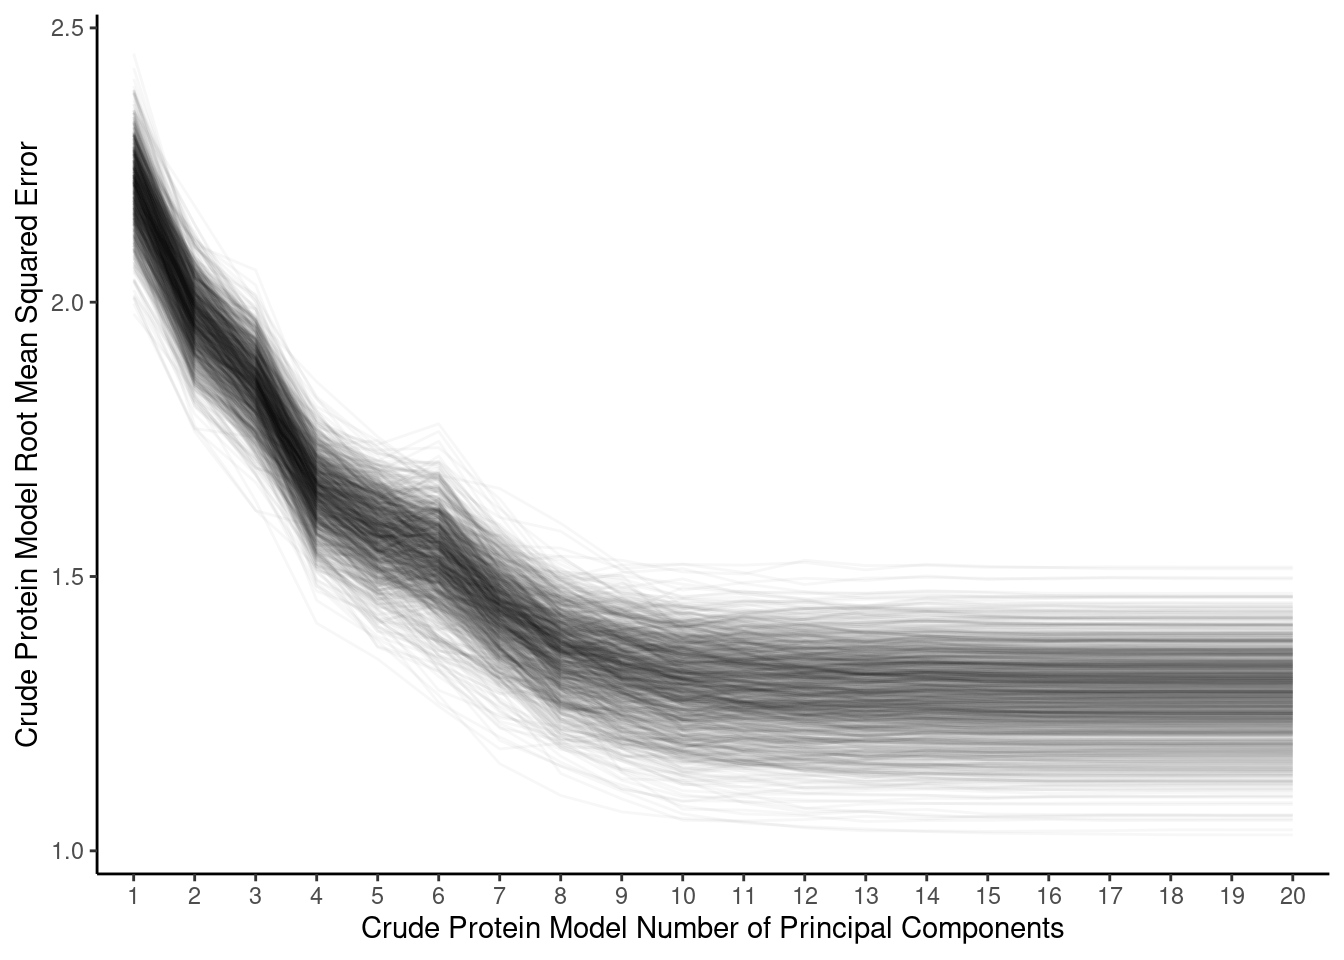

In [ ]:
model_n_comp_statistics <- fread("./input_data/simplified_data/final_model_n_component_stats.csv")

model_n_comp_statistics |> 
  ggplot(aes(as.factor(ncomp), RMSE)) + 
  geom_line(aes(group = id), alpha = 0.03) + 
  theme_classic() + 
  xlab("Crude Protein Model Number of Principal Components") + 
  ylab("Crude Protein Model Root Mean Squared Error")

**calculate relative distance from minima** The relative ranks of the models are stable at approximately 14 PCs, with very few models (lines) crossing over one another.

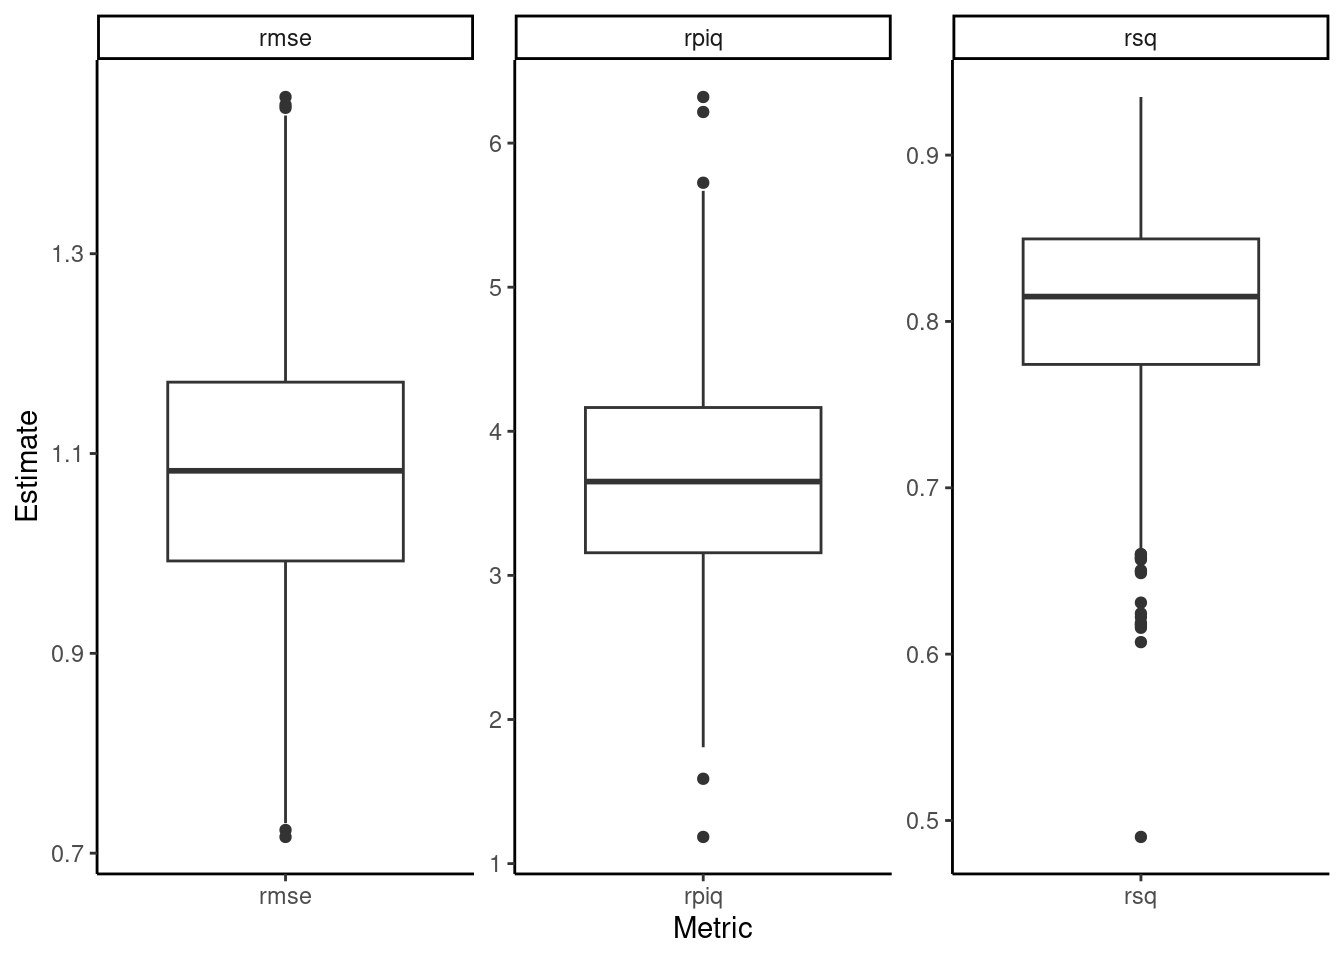

In [ ]:
model_final_predictions <- fread("./input_data/simplified_data/final_model_predictions_revised.csv")

final_model_table <- model_final_predictions |> 
  group_by(id) |> 
  multi_metric(crude_protein, predicted_crude_protein)

final_model_table |> 
  ggplot(aes(x = .metric, y = .estimate)) + 
  theme_classic() + geom_boxplot() + 
  facet_wrap(vars(.metric), scales = "free") +
  xlab("Metric") + ylab("Estimate")

In [ ]:
# add difference calculation between predicted and observed...
model_final_predictions[,difference := predicted_crude_protein - crude_protein]

In [ ]:
# my_cut <- cut(spectra_2$crude_protein, 3)
# cut_dt <- data.table(ith_in_data_set = 1:149, cutpoints = my_cut)


# revised_model_cutpoints
cutpoints2 <- model_final_predictions |> 
  distinct(ith_in_data_set, crude_protein) |> 
  mutate(cutpoints = cut(crude_protein, 3))

Joining with `by = join_by(crude_protein, ith_in_data_set)`

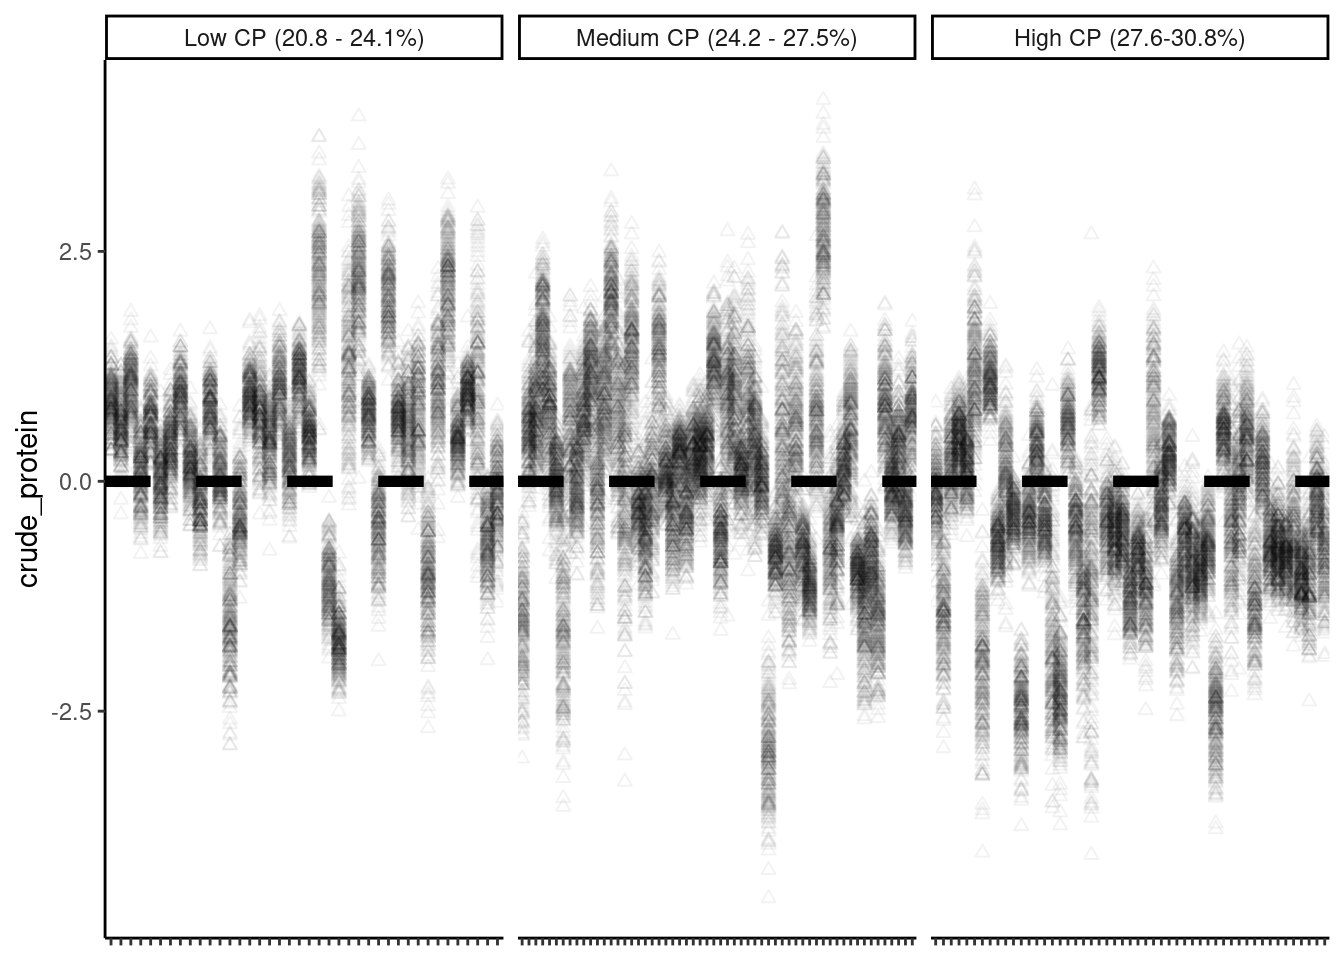

In [ ]:
# 
# model_final_predictions |> 
#   left_join(cut_dt) |> 
#   ggplot(aes(fct_reorder(
#     ith_in_data_set |> as.character(),
#     crude_protein), crude_protein))+
#   geom_point(aes(fct_reorder(
#     ith_in_data_set |> as.character(),
#     crude_protein), difference), alpha = 0.05, shape = 2) +
#     geom_hline(yintercept = 0, linewidth = 2, lty = 2)+
#   facet_wrap( ~cutpoints, scales = "free_x",
#           labeller = as_labeller(c("(20.8,24.1]" = "Low (20.8 - 24.1)",
#                                    "(24.1,27.5]"= "Medium (24.2 - 27.5)",
#                                    "(27.5,30.8]" ="High (27.6-30.8)"))) + 
#     theme_classic()+
#   theme(
#     axis.title.x = element_blank(),
#     axis.text.x = element_blank())

model_final_predictions |> 
  left_join(cutpoints2) |> 
  ggplot(aes(fct_reorder(
    ith_in_data_set |> as.character(),
    crude_protein), crude_protein))+
  geom_point(aes(fct_reorder(
    ith_in_data_set |> as.character(),
    crude_protein), difference), alpha = 0.05, shape = 2) +
  geom_hline(yintercept = 0, linewidth = 2, lty = 2) +
  facet_wrap( ~cutpoints, scales = "free_x",
              labeller = as_labeller(c("(20.8,24.1]" = "Low CP (20.8 - 24.1%)",
                                       "(24.1,27.5]"= "Medium CP (24.2 - 27.5%)",
                                       "(27.5,30.8]" ="High CP (27.6-30.8%)"))) + 
  theme_classic()+
  theme(
    axis.title.x = element_blank(),
    axis.text.x = element_blank())

Errors tend to be lower at higher levels of actual CP

This study is limited in that it represents the creation of one model based upon spectra collected from one machine. NIRS calibrations can be unique to a particular machine, if the machines compared are of the same model \[@reeves2012\]. As well, the calibration and validation sets are relatively small.

This research showed the promise of the use of NIRS in order to make predictions concerning %CP in hemp grain using PLS. Promising preprocessing methods were identified and a model was validated. Further research could refine the model by including more samples or by examining other predictive methods.

## ACKNOWLEDGMENTS

## SUPPLEMENTAL MATERIAL

## OPTIONAL SECTIONS

## REFERENCES

## FIGURES AND TABLES

In [ ]:
eruptions <- c(1492, 1585, 1646, 1677, 1712, 1949, 1971, 2021)
n_eruptions <- length(eruptions)

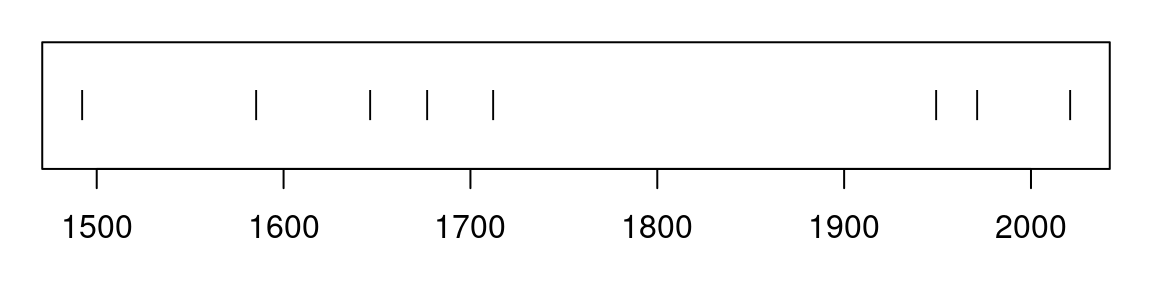

In [ ]:
par(mar = c(3, 1, 1, 1) + 0.1)
plot(eruptions, rep(0, n_eruptions), 
  pch = "|", axes = FALSE)
axis(1)
box()

In [ ]:
avg_years_between_eruptions <- mean(diff(eruptions[-n_eruptions]))
avg_years_between_eruptions

[1] 79.83333

Based on data up to and including 1971, eruptions on La Palma happen every 79.8 years on average.

Studies of the magma systems feeding the volcano, such as @marrero2019, have proposed that there are two main magma reservoirs feeding the Cumbre Vieja volcano; one in the mantle (30-40km depth) which charges and in turn feeds a shallower crustal reservoir (10-20km depth).

Eight eruptions have been recorded since the late 1400s (@fig-timeline).

Data and methods are discussed in @sec-data-methods.

Let $x$ denote the number of eruptions in a year. Then, $x$ can be modeled by a Poisson distribution

$$
p(x) = \frac{e^{-\lambda} \lambda^{x}}{x !}
$$ {#eq-poisson}

where $\lambda$ is the rate of eruptions per year. Using @eq-poisson, the probability of an eruption in the next $t$ years can be calculated.

| Name                | Year |
|---------------------|------|
| Current             | 2021 |
| Teneguía            | 1971 |
| Nambroque           | 1949 |
| El Charco           | 1712 |
| Volcán San Antonio  | 1677 |
| Volcán San Martin   | 1646 |
| Tajuya near El Paso | 1585 |
| Montaña Quemada     | 1492 |

@tbl-history summarises the eruptions recorded since the colonization of the islands by Europeans in the late 1400s.

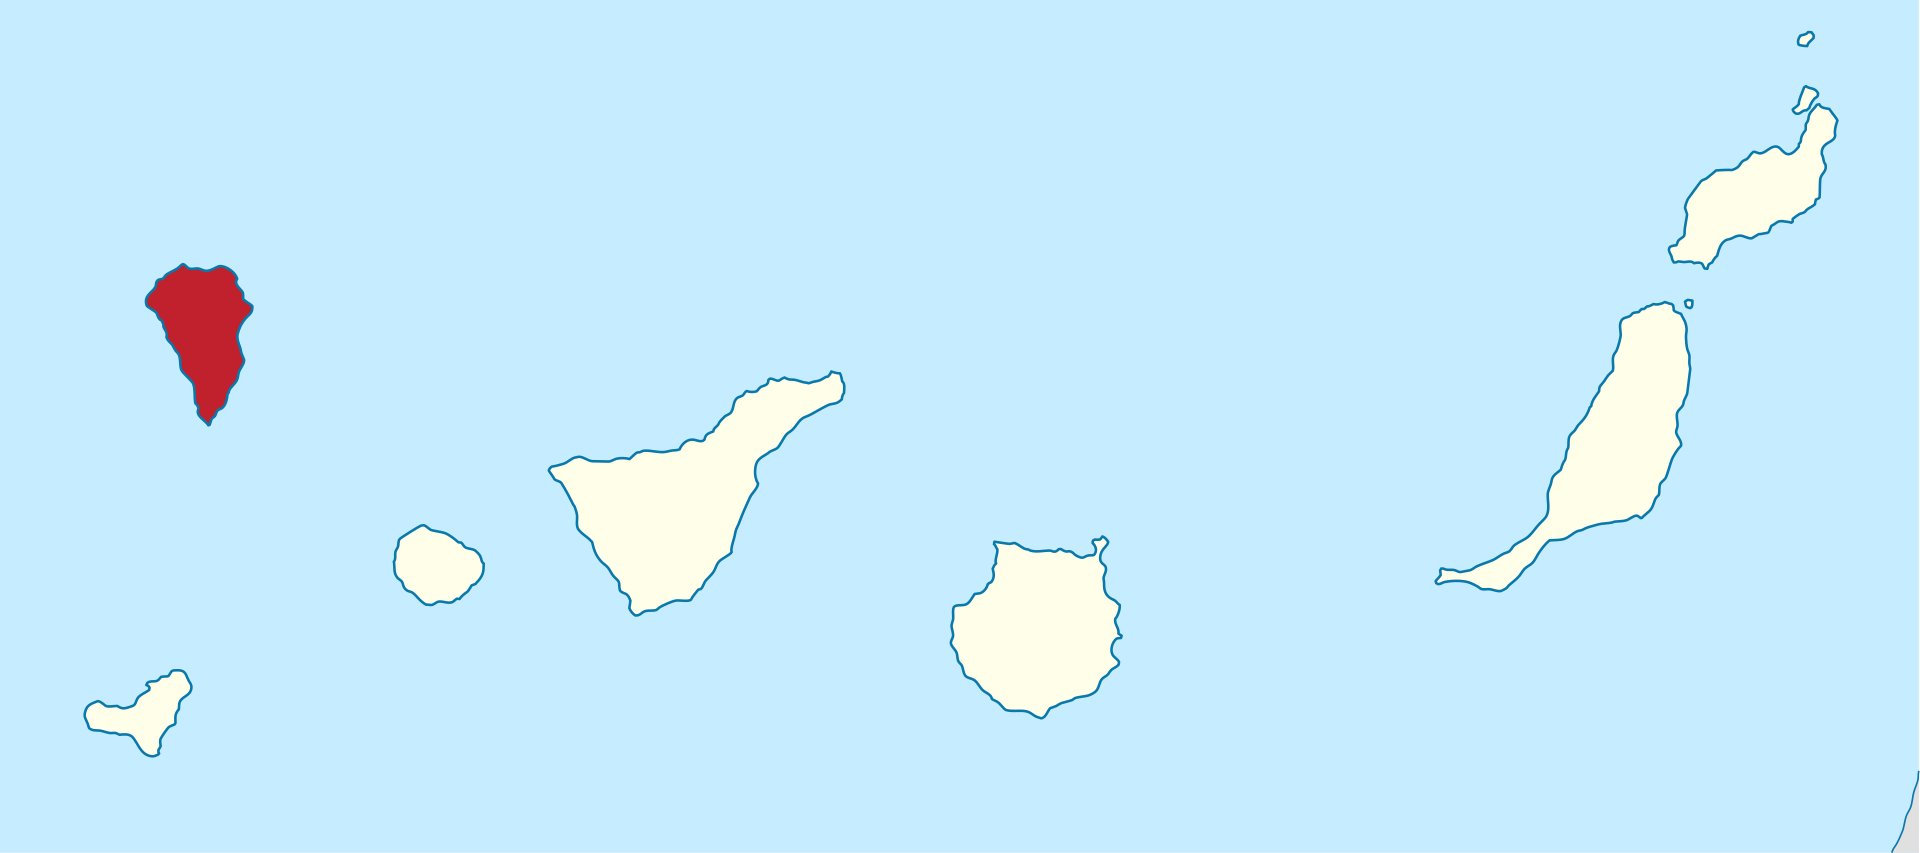{#fig-map }

La Palma is one of the west most islands in the Volcanic Archipelago of the Canary Islands (@fig-map).

``` python
la_palma |> 
  ggplot(aes(Longitude, Latitude)) +
  geom_point(aes(color = Magnitude, size = 40-`Depth(km)`)) +
  scale_color_viridis_c(direction = -1) + 
  scale_size(range = c(0.5, 2), guide = "none") +
  theme_bw()
```

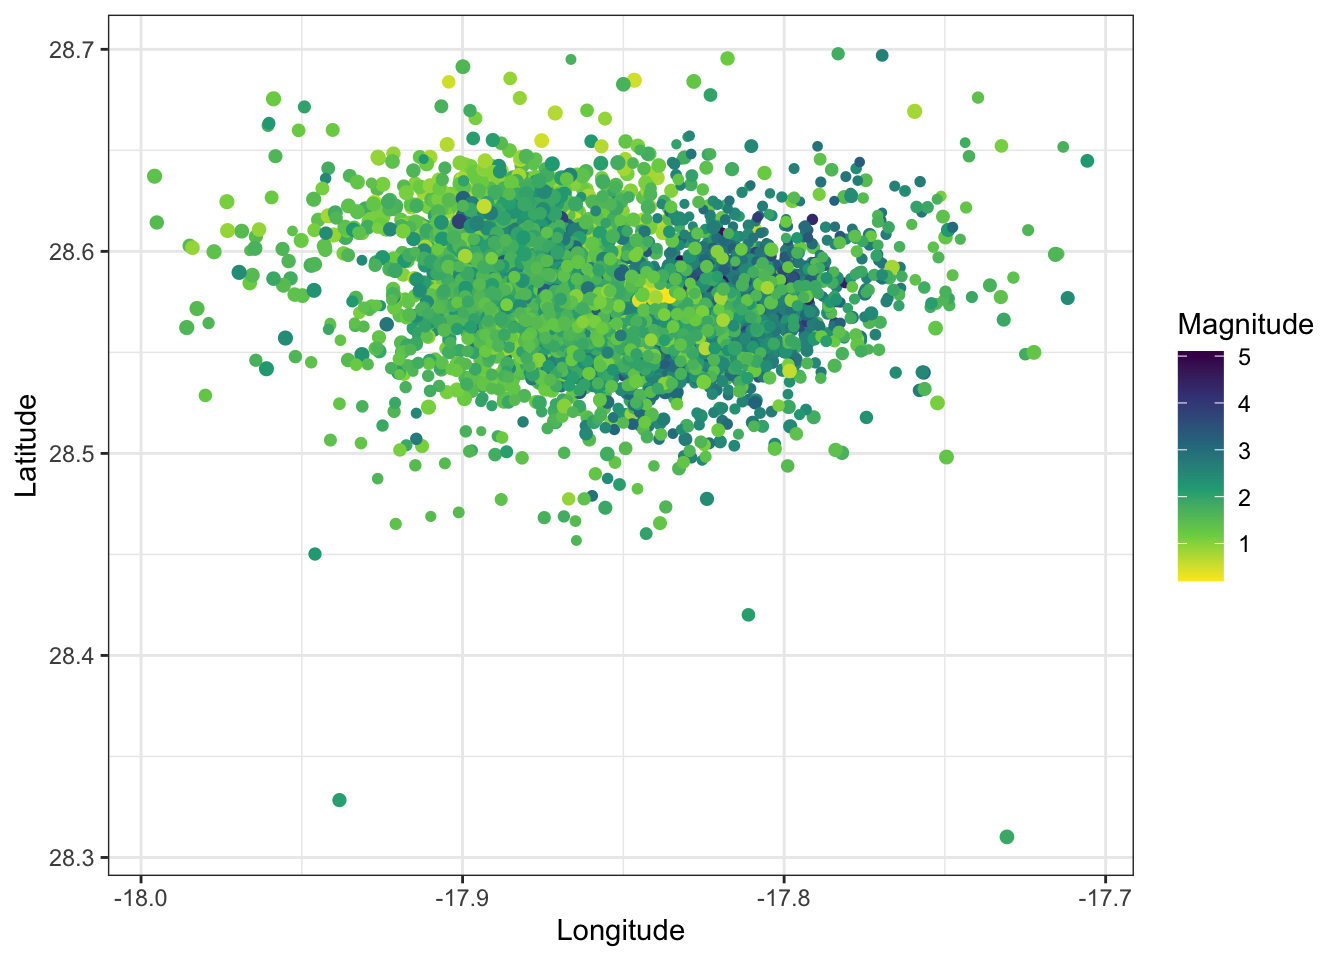

@fig-spatial-plot shows the location of recent Earthquakes on La Palma.

## Data & Methods

## Conclusion

## References